Importing the Dependencies

In [1]:
import numpy as np  # used for array
import pandas as pd # used for data processing (data loading, data manipulation, etc)
import matplotlib.pyplot as plt  # used for plotting graphs
import seaborn as sns # used for data visualization
from sklearn.preprocessing import LabelEncoder # Encode target labels with value between 0 and num_of_classes-1
from sklearn.model_selection import train_test_split  # used for splitting the data into training data and testing data
from xgboost import XGBRegressor  # used for XGBRegressor
from sklearn import metrics  # used for mean r2 error (accuracy score for XGBRegressor)

Data Collection and Processing

In [2]:
# loading the data from csv file to Pandas DataFrame

big_mart_data = pd.read_csv('Train.csv')

In [3]:
# .head() displays the first 5 rows, and first n columns

# python indexes the column and row number starting from 0.

big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1]:
# number of data points & number of features
# .shape() gives number of rows x columns (38523,12)   

big_mart_data.shape

NameError: name 'big_mart_data' is not defined

In [5]:
# getting some information about the dataset

big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [6]:
# checking for missing values per every column

big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [7]:
# mean value of "Item_Weight" column
m = big_mart_data['Item_Weight'].mean()
print(m)

12.857645184136183


In [8]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

# another way to do the same 
big_mart_data['Item_Weight'].fillna(m, inplace = True)

In [9]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [10]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
miss_values = big_mart_data['Outlet_Size'].isnull()   

In [13]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [15]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [16]:
big_mart_data.describe()

# some statistical measures for numerical columns ONLY

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [17]:
sns.set()

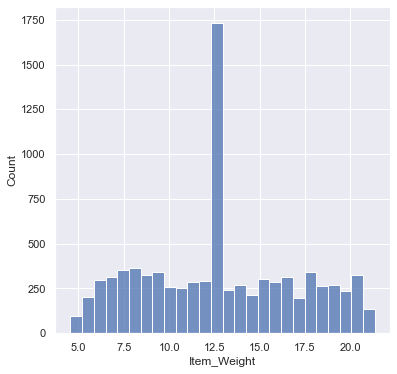

In [18]:
# Item Weight distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Weight'])
plt.show()
# 12.5 is the most common item weight

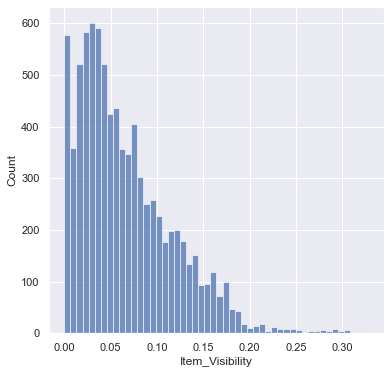

In [19]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Visibility'])
plt.show()
# Right-Skewness in visible in the graph

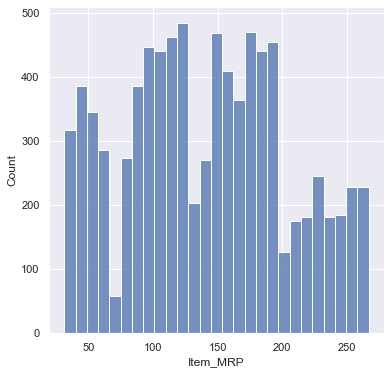

In [20]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_MRP'])
plt.show()

# Almost a normal distribution

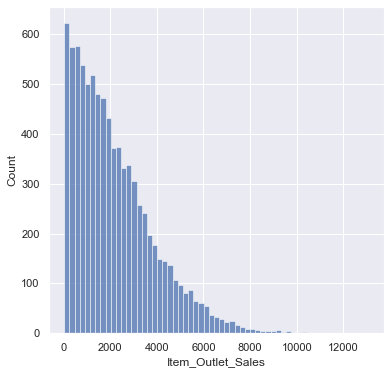

In [21]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

# Right-Skewness is visible

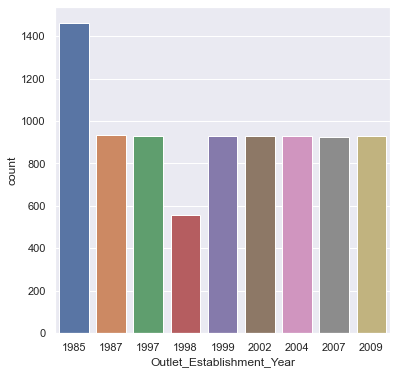

In [22]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

# Normal distribution

Categorical Features

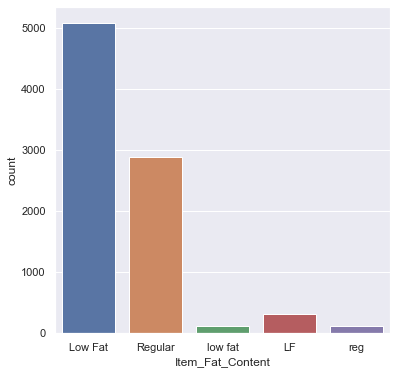

In [23]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

# Repeated values, therefore graph is misleading. Will need to clean the graph after analyzing it

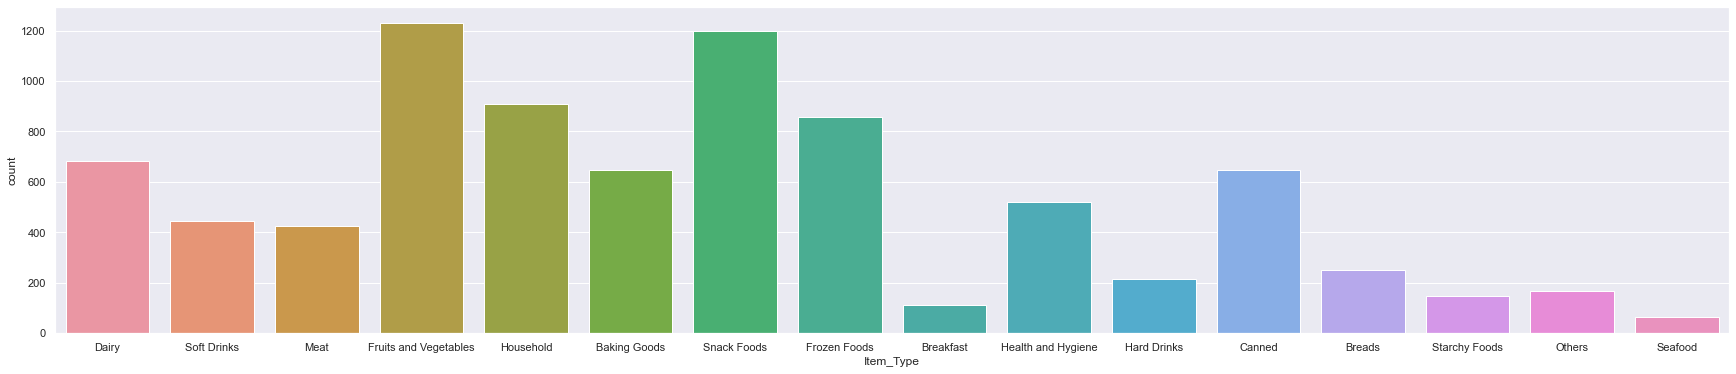

In [24]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

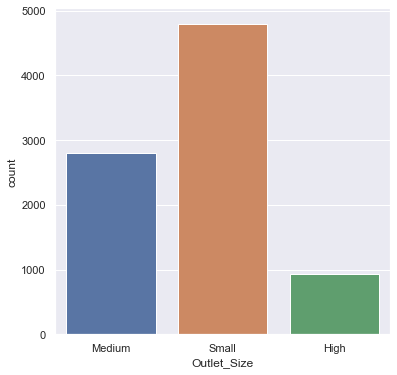

In [25]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

Data Pre-Processing

In [26]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
# Low Fat, LF and low fat are the same thing
# reg, Regular are the same thing too

big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [28]:
# only have 2 values in the label column

big_mart_data['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

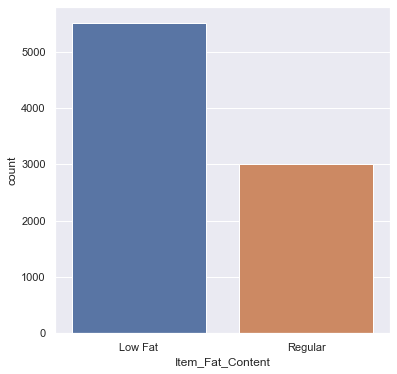

In [29]:
# Cleaned Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

# more accurate graph

Label Encoding

In [30]:
encoder = LabelEncoder()
# convert all categorical values into some numerical value
# eg, Item Type has 16 categorical values, which will now be labelled 0-14

In [31]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [32]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [33]:
# X variable represents the input data
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)

# Y variable represents the target column
Y = big_mart_data['Item_Outlet_Sales']

In [34]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [35]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training data & Testing Data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor

In [38]:
regressor = XGBRegressor()

In [39]:
regressor.fit(X_train, Y_train)

[17:21:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [40]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [41]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [42]:
print('R Squared value = ', r2_train)

R Squared value =  0.6364457030941357


In [43]:
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print(score_2)

# larger mean absolute error is exected due to the large values in target column

719.4796136737632


In [44]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [45]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [46]:
print('R Squared value = ', r2_test)

R Squared value =  0.5867640914432671


In [47]:
score_3 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print(score_3)

# larger mean absolute error is exected due to the large values in target column

788.9621892041749


Text(0.5, 1.0, 'Actual Y_train v/s Predicted training_data_prediction')

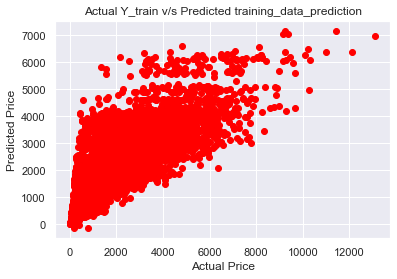

In [48]:
# Plotting graphs between Actual Y_train and Predicted training_data_prediction
plt.scatter(Y_train, training_data_prediction, color = 'red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Y_train v/s Predicted training_data_prediction')
# shows some linearity,points are closely bounded


Text(0.5, 1.0, 'Actual Y_test v/s Predicted test_data_prediction')

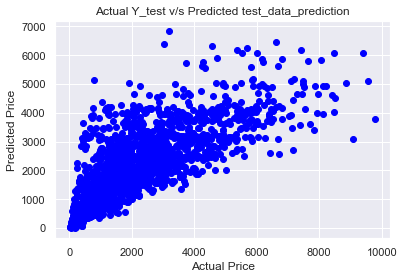

In [49]:
# Plotting graphs between Actual Y_test and Predicted test_data_prediction
plt.scatter(Y_test, test_data_prediction, color = 'blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Y_test v/s Predicted test_data_prediction')
# this polot also shows some linearity and points are closely bounded
# Hence, Model works good with both train and test data